# Genome accessibility

In [1]:
%run ../../shared_setup.ipynb

The Cython magic has been move to the Cython package, hence 
`%load_ext cythonmagic` is deprecated; Please use `%load_ext Cython` instead.

Though, because I am nice, I'll still try to load it for you this time.


In [2]:
tbl_regions_1b.display(5, caption='Genome regions classification')

0|region_chrom,1|region_start,2|region_stop,3|region_type,4|region_size
Pf3D7_01_v3,1,27336,SubtelomericRepeat,27336
Pf3D7_01_v3,27337,92900,SubtelomericHypervariable,65564
Pf3D7_01_v3,92901,457931,Core,365031
Pf3D7_01_v3,457932,460311,Centromere,2380
Pf3D7_01_v3,460312,575900,Core,115589


In [3]:
tbl_regions_total_size = (
    tbl_regions_1b
    .aggregate('region_type', sum, 'region_size')
    .rename('value', 'total_size')
)
lkp_regions_total_size = tbl_regions_total_size.lookupone('region_type', 'total_size') 
tbl_regions_total_size.displayall(caption='Total size of region types')

0|region_type,1|total_size
Centromere,31922
Core,20782107
InternalHypervariable,344759
SubtelomericHypervariable,1571888
SubtelomericRepeat,561966


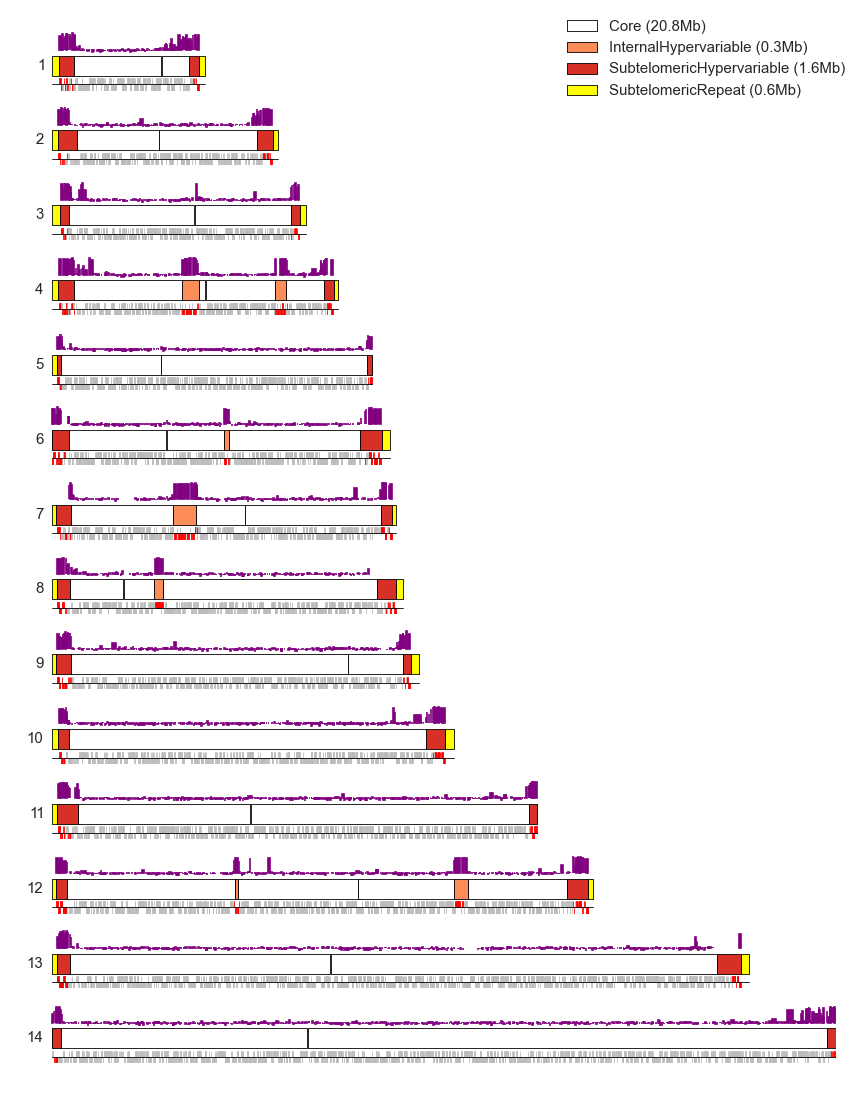

In [14]:
max_chr_size = max(len(fasta[str(chrom, 'ascii')]) for chrom in CHROMOSOMES)

fig = plt.figure(figsize=(7, 9))

gs = mpl.gridspec.GridSpec(4*14, 1, height_ratios=[1, 1, .5, .5]*14)
gs.update(hspace=0)

for i, chrom in enumerate(CHROMOSOMES):
    chrom = str(chrom, 'ascii')
    
    ax = fig.add_subplot(gs[i*4+0])
    plot_hp1(ax, chrom)
    ax.set_xlim(-5000, max_chr_size)
    
    ax = fig.add_subplot(gs[i*4+1])
    plot_accessibility(ax, chrom, linewidth=.5)
    ax.set_xlim(-5000, max_chr_size)
    chrnum = int(chrom[6:8])
    ax.set_ylabel(chrnum, ha='right', va='center', rotation=0)
    
    ax = fig.add_subplot(gs[i*4+2])
    plot_genes(ax, chrom, hypervariable_color='red', normal_color='#bbbbbb', width=.5, divider_linewidth=.5)
    ax.spines['bottom'].set_visible(False)
    ax.set_xlim(-5000, max_chr_size)
    ax.set_xticks([])
    
fig.tight_layout()

# legend
ax = fig.add_axes([0, 0, 1, 1])
ax.set_axis_off()
ax.set_xticks([])
ax.set_yticks([])
region_types = 'Core', 'InternalHypervariable', 'SubtelomericHypervariable', 'SubtelomericRepeat'
leg_artists = [plt.Rectangle((0, 0), 1, 1, fc=accessibility_colors[r]) for r in region_types]
leg_labels = ['%s (%.1fMb)' % (r, lkp_regions_total_size[r]*1./1e6) for r in region_types]
ax.legend(leg_artists, leg_labels, bbox_to_anchor=(1, 1), loc='upper right', borderaxespad=0.1)

fn = '../../artwork/supp/genome_regions_map.{dpi}.{fmt}'
for fmt in 'jpeg', 'png':
    for dpi in 120, 300:
        fig.savefig(fn.format(dpi=dpi, fmt=fmt), dpi=dpi, jpeg_quality=100)


In [13]:
tbl_coverage_summary_by_region = etl.fromtsv(os.path.join(PUBLIC_DIR, 'tbl_coverage_summary_by_region.wg.txt')).convertnumbers()
tbl_coverage_summary_by_region.eq('region', 'Core').displayall()

0|run,1|region,2|pc_not_covered
ERR019061,Core,0.06750037424020577
ERR019054,Core,0.12134958211888718
ERR012788,Core,0.10480169311032804
ERR012840,Core,0.05205439467711335
ERR027099,Core,0.32629992714405714
ERR027100,Core,0.1215228080579125


In [15]:
tbl_mq0_summary_by_region = etl.fromtsv(os.path.join(PUBLIC_DIR, 'tbl_mq0_summary_by_region.wg.txt')).convertnumbers()
tbl_mq0_summary_by_region.eq('region', 'Core').displayall()

0|run,1|region,2|pc_mq0
ERR019061,Core,0.8333081915130165
ERR019054,Core,0.9997927544112828
ERR012788,Core,1.0587184446697344
ERR012840,Core,1.0331146885154618
ERR027099,Core,1.1333884480529333
ERR027100,Core,1.1241593549681945


## Sandbox

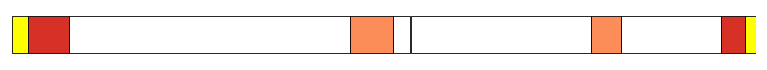

In [7]:
fig, ax = plt.subplots(figsize=(8, .5))
plot_accessibility(ax, 'Pf3D7_04_v3')

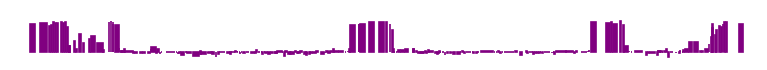

In [8]:
fig, ax = plt.subplots(figsize=(8, .5))
plot_hp1(ax, 'Pf3D7_04_v3')

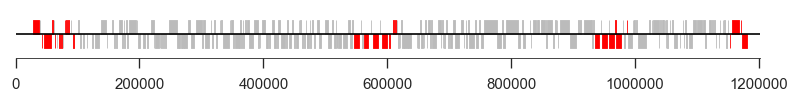

In [9]:
fig, ax = plt.subplots(figsize=(8, .5))
chrom = 'Pf3D7_04_v3'
plot_genes(ax, chrom, hypervariable_color='r', normal_color='#bbbbbb')